In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import time
from datetime import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')
rcParams['figure.figsize'] = 10, 6

In [2]:
address = 'C:/Users/zekus/Desktop/Data Analysis/Google Data Analytics Certificate/case study project/202004-divvy-tripdata.csv'
df = pd.read_csv(address, parse_dates=['started_at','ended_at'])
df.columns = ['ride_id','rideable_type','started_at','ended_at','end_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']
dropped_df = df.fillna(0).dropna().drop(labels=['rideable_type', 'ride_id','start_lat','start_lng','end_lat','end_lng'], axis=1)
dropped_df['started_at'] = pd.to_datetime(dropped_df['started_at'])
dropped_df['ended_at'] = pd.to_datetime(dropped_df['ended_at'])
dropped_df[['started_at','ended_at']] = dropped_df[['started_at','ended_at']].apply(pd.to_datetime)
dropped_df['trip_len'] = dropped_df['ended_at'] - dropped_df['started_at'] 
dropped_df['day_name'] = dropped_df['started_at'].dt.day_name()
dropped_df['day_number'] = dropped_df['started_at'].dt.day_of_week
(dropped_df)


,started_at,ended_at,end_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_len,day_name,day_number
0,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,member,0 days 00:26:49,Sunday,6
1,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,member,0 days 00:08:09,Friday,4
2,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,member,0 days 00:14:23,Wednesday,2
3,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,member,0 days 00:12:12,Tuesday,1
4,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,casual,0 days 00:52:55,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
84771,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,member,0 days 00:12:55,Thursday,3
84772,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,casual,0 days 00:19:09,Thursday,3
84773,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,casual,0 days 01:53:10,Friday,4
84774,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,casual,0 days 00:42:31,Thursday,3


In [3]:
dropped_df['started_at'].min(), dropped_df['started_at'].max()



(Timestamp('2020-04-01 00:00:30'), Timestamp('2020-04-30 23:57:20'))

In [4]:
dropped_df['ended_at'].min(), dropped_df['ended_at'].max()


(Timestamp('2020-04-01 00:10:45'), Timestamp('2020-05-30 15:30:55'))

In [5]:
dropped_df['started_at'].max() - dropped_df['started_at'].min()

Timedelta('29 days 23:56:50')

In [6]:
dropped_df['start_station_id'].value_counts()

176    850
110    730
56     720
211    686
94     626
      ... 
556      1
574      1
562      1
639      1
4        1
Name: start_station_id, Length: 602, dtype: int64

In [ ]:
dropped_df['start_station_id'].value_counts()

In [7]:
dropped_df['end_station_id'].value_counts()

176.0    893
110.0    785
211.0    695
56.0     678
300.0    675
        ... 
568.0      1
563.0      1
566.0      1
562.0      1
651.0      1
Name: end_station_id, Length: 601, dtype: int64

In [8]:
dropped_df['member_casual'].value_counts()

member    61148
casual    23628
Name: member_casual, dtype: int64

In [9]:
dropped_df['day_name'].value_counts(),dropped_df['day_number'].value_counts()

(Sunday       17915
 Saturday     12910
 Tuesday      12813
 Thursday     11703
 Monday       10745
 Friday        9972
 Wednesday     8718
 Name: day_name, dtype: int64,
 6    17915
 5    12910
 1    12813
 3    11703
 0    10745
 4     9972
 2     8718
 Name: day_number, dtype: int64)

In [10]:
dropped_df.groupby(by='member_casual').describe().drop(labels=['start_station_id', 'end_station_id','day_number'], axis=1)

trip_len                                                        \
                 count                       mean                        std   
member_casual                                                                  
casual           23628  0 days 01:13:04.271161334  0 days 15:00:19.133559233   
member           61148  0 days 00:21:28.050026166  0 days 06:04:09.636203360   

                                                                           \
                             min              25%                     50%   
member_casual                                                               
casual         -1 days +23:59:27  0 days 00:14:40  0 days 00:25:15.500000   
member         -1 days +23:57:04  0 days 00:07:27         0 days 00:13:42   

                                                         
                                  75%               max  
member_casual                                            
casual         0 days 00:42:46.250000  38 days 16:03:53  
member                0 days 00:23:47  40 days 18:40:02

In [11]:
casual_only =  dropped_df[(dropped_df.member_casual == "casual")]
casual_only

,started_at,ended_at,end_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_len,day_name,day_number
4,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,casual,0 days 00:52:55,Saturday,5
7,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,casual,0 days 01:15:49,Tuesday,1
8,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,casual,0 days 00:05:44,Wednesday,2
17,2020-04-18 02:59:09,2020-04-18 03:07:22,Leavitt St & Archer Ave,9,Leavitt St & Archer Ave,9.0,casual,0 days 00:08:13,Saturday,5
18,2020-04-04 10:52:08,2020-04-04 11:08:03,Clark St & Lincoln Ave,141,Southport Ave & Wrightwood Ave,190.0,casual,0 days 00:15:55,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
84766,2020-04-07 07:53:54,2020-04-07 07:53:46,Wood St & Milwaukee Ave,61,Wood St & Milwaukee Ave,61.0,casual,-1 days +23:59:52,Tuesday,1
84772,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,casual,0 days 00:19:09,Thursday,3
84773,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,casual,0 days 01:53:10,Friday,4
84774,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,casual,0 days 00:42:31,Thursday,3


In [12]:
member_only =  dropped_df[(dropped_df.member_casual == "member")]
member_only

,started_at,ended_at,end_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_len,day_name,day_number
0,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,member,0 days 00:26:49,Sunday,6
1,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,member,0 days 00:08:09,Friday,4
2,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,member,0 days 00:14:23,Wednesday,2
3,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,member,0 days 00:12:12,Tuesday,1
5,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,member,0 days 00:05:24,Thursday,3
...,...,...,...,...,...,...,...,...,...,...
84767,2020-04-12 14:49:38,2020-04-12 14:57:40,Clark St & North Ave,126,State St & Pearson St,106.0,member,0 days 00:08:02,Sunday,6
84768,2020-04-12 14:07:59,2020-04-12 14:43:28,Lake Shore Dr & North Blvd,268,Clark St & Lincoln Ave,141.0,member,0 days 00:35:29,Sunday,6
84769,2020-04-12 14:07:40,2020-04-12 14:07:48,Lake Shore Dr & North Blvd,268,Lake Shore Dr & North Blvd,268.0,member,0 days 00:00:08,Sunday,6
84770,2020-04-12 12:14:10,2020-04-12 12:21:15,State St & Pearson St,106,Lake Shore Dr & North Blvd,268.0,member,0 days 00:07:05,Sunday,6


<AxesSubplot:>

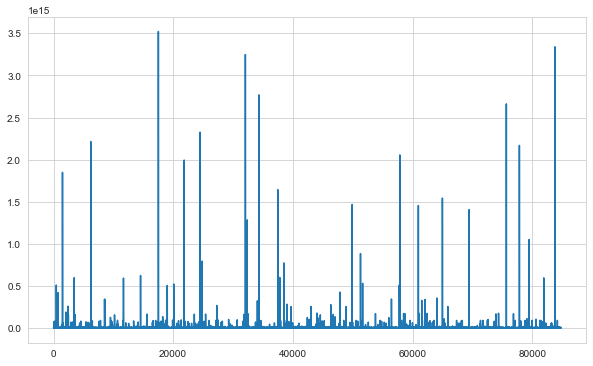

In [13]:
mpg = dropped_df['trip_len']
mpg.plot()

In [14]:
dropped_df['trip_len'].mean(),dropped_df['trip_len'].max(),dropped_df['trip_len'].median()

(Timedelta('0 days 00:35:51.000778522'),
 Timedelta('40 days 18:40:02'),
 Timedelta('0 days 00:16:22'))

<AxesSubplot:>

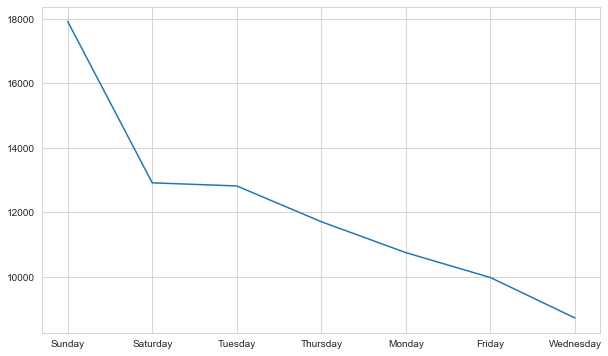

In [15]:
mpg = dropped_df['day_name'].value_counts()
mpg.plot()

<AxesSubplot:>

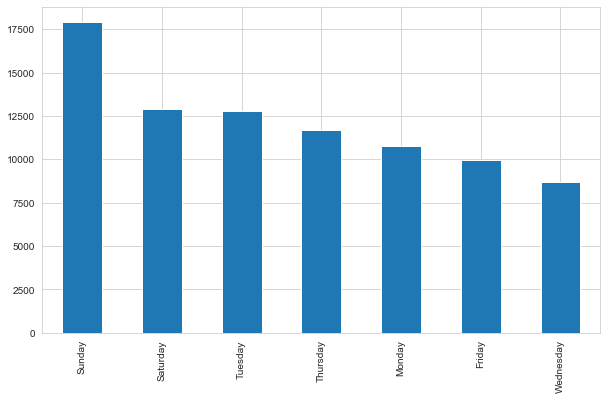

In [16]:
mpg.plot(kind="bar")

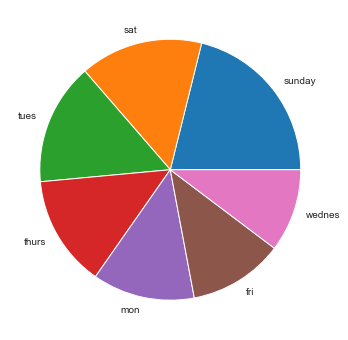

In [17]:
veh_type = ['sunday', 'sat', 'tues', 'thurs', 'mon','fri','wednes']
plt.pie(mpg,labels=veh_type)
plt.savefig('pie_chart.png')
plt.show()

<AxesSubplot:xlabel='end_station_id', ylabel='start_station_id'>

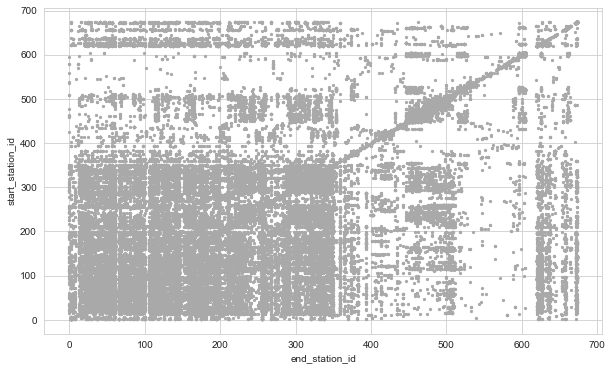

In [18]:
dropped_df.plot(kind='scatter', x= 'end_station_id', y='start_station_id', c=['darkgray'], s=5)

<AxesSubplot:title={'center':'end_station_id'}, xlabel='member_casual'>

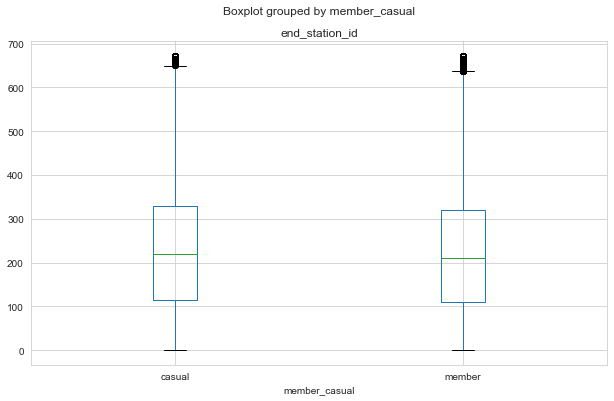

In [19]:
dropped_df.boxplot(column='end_station_id', by='member_casual')

<AxesSubplot:title={'center':'start_station_id'}, xlabel='member_casual'>

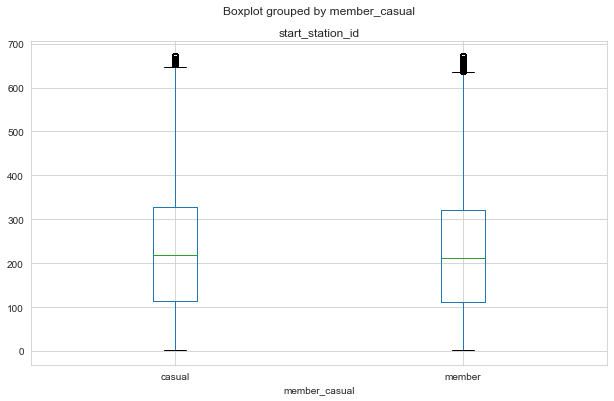

In [20]:
dropped_df.boxplot(column='start_station_id', by='member_casual')